In [31]:
# import packages
import pandas as pd
import numpy as np
from collections import Counter
import re
import matplotlib.pyplot as plt

In [3]:
chocolate = pd.read_csv('data/chocolate.csv')
chocolate

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,1205,Habitual,Canada,2014,Blend,one hundred,100%,NaN,"unrefined, bitter, earthy",2.00
1,701,Haigh,Australia,2011,Blend,South America and Africa,70%,NaN,"vanilla, chocolate milk",3.00
2,1113,Hotel Chocolat,U.K.,2013,St. Lucia,"Island Growers, 2012, 120hr c., batch 13080",100%,NaN,"pastey, bitter, unfixable",1.75
3,296,Hotel Chocolat (Coppeneur),U.K.,2008,Uganda,Uganda,80%,NaN,"charred, espresso",2.50
4,552,Hotel Chocolat (Coppeneur),U.K.,2010,Ecuador,Ecuador,70%,NaN,"spicy, sour, burning",2.75
...,...,...,...,...,...,...,...,...,...,...
1555,336,Bonnat,France,2009,Peru,"Porcelana, Apotequil",75%,"3- B,S,C","flat, bread, earthy",2.75
1556,331,Bonnat,France,2009,Ivory Coast,Ivory Coast,75%,"3- B,S,C","oily, intense cocoa, sl. Burnt",3.00
1557,336,Bonnat,France,2009,Mexico,"Porcelana, Tabasco, Marfil de Blanco",75%,"3- B,S,C","mild bitter, nut, possible mold",3.00
1558,395,Bonnat,France,2009,Mexico,"Xoconusco, cacao Real",75%,"3- B,S,C","fatty, roasty, earthy",3.00


### Analyzing the Difference of Cocoa Percent between Different Companies

Even though the dataset is said to include over 2500 dark chocolate bars, different dark chocolate bars have different percentage of cocoa included. In the following analysis, we are trying to see if there would be a difference in the cocoa percentage of chocolate bars produced by different companies. Specifically, we calculate the mean, median, maximum and minimum cocoa percent of chocolate bars made by each company. 

In [26]:
# Store the data in the 'cocoa percent' column in a list as numeric data
cocoa_percent_lst = []
for i in chocolate["Cocoa Percent"].tolist():
    cocoa_percent_lst.append(float(re.sub('%', '', i)))
cocoa_percent_lst
# Calculate the mean, median, maximum, and minimum cocoa percent of each company
chocolate['mean cocoa percent'] = cocoa_percent_lst
chocolate['median cocoa percent'] = cocoa_percent_lst
chocolate['max cocoa percent'] = cocoa_percent_lst
chocolate['min cocoa percent'] = cocoa_percent_lst
company_cocoa_percent = chocolate.groupby('Company (Manufacturer)').agg({'mean cocoa percent':'mean', 'median cocoa percent':'median',
                                                                        'max cocoa percent':'max', 'min cocoa percent':'min'})
company_cocoa_percent = company_cocoa_percent.sort_values(by=['mean cocoa percent'], ascending=False)
company_cocoa_percent
#company_cocoa_percent.to_csv('tables/company_cocoa_percent.csv')

,mean cocoa percent,median cocoa percent,max cocoa percent,min cocoa percent
Company (Manufacturer),,,,
Pacari,100.0,100.0,100.0,100.0
Coppeneur,100.0,100.0,100.0,100.0
TCHO,99.0,99.0,99.0,99.0
Bouga Cacao (Tulicorp),88.5,88.5,100.0,77.0
Pralus,87.5,87.5,100.0,75.0
...,...,...,...,...
Machu Picchu Trading Co.,62.5,62.5,70.0,55.0
Two Ravens,60.0,60.0,60.0,60.0
La Pepa de Oro,60.0,60.0,60.0,60.0


From the table above, we can clearly see that there is a difference in the cocoa percent of the dark chocolate bars produced by different companies, and the range of cocoa percent is from 60% to 100%.

### Analyze if the Average Cocoa Percent of Different Chocolate Bars has changed Over Times

Moving on, we will analyze to see if the averge cocoa percent of different chocolate bars from different companies has changed over times. Intuitively, there shouldn't be any big differences between the average cocoa percent of different years since a change in cocoa percent in different years would mean that many companies suddenly decided to change their cocoa percent included in their bars in that year (which would result in a big change in the average cocoa percent for the year after), and that is not likely to happen. We will use the following section to verify our assumptions.

In [40]:
year_cocoa_percent = chocolate.groupby('Review Date').agg({'mean cocoa percent':'mean', 'median cocoa percent':'median',
                                                                        'max cocoa percent':'max', 'min cocoa percent':'min'})
year_cocoa_percent
#year_cocoa_percent.to_csv('tables/year_cocoa_percent.csv')

,mean cocoa percent,median cocoa percent,max cocoa percent,min cocoa percent
Review Date,,,,
2006,75.454545,75.0,100.0,70.0
2007,73.913043,70.0,100.0,60.0
2008,75.392857,70.5,100.0,60.0
2009,72.854545,72.0,100.0,64.0
2010,72.330000,72.0,100.0,55.0
2011,71.369565,70.0,88.0,60.0
2012,71.955752,70.0,100.0,60.0
2013,74.378947,72.0,100.0,55.0
2014,72.801948,72.0,100.0,60.0


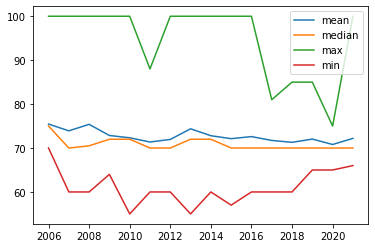

<Figure size 432x288 with 0 Axes>

In [43]:
year = year_cocoa_percent.index.tolist()
mean = year_cocoa_percent['mean cocoa percent'].tolist()
median = year_cocoa_percent['median cocoa percent'].tolist()
max_percent = year_cocoa_percent['max cocoa percent'].tolist()
min_percent = year_cocoa_percent['min cocoa percent'].tolist()
# plot lines
plt.plot(year, mean, label = "mean")
plt.plot(year, median, label = "median")
plt.plot(year, max_percent, label = "max")
plt.plot(year, min_percent, label = "min")
plt.legend()
plt.show()
plt.savefig("figures/cocoa_percent_change_over_years.png")


In [12]:
def country_common_charac(chocolate_df, country_name):
    chocolate_country = chocolate_df[chocolate_df['Country of Bean Origin'] == country_name][["Most Memorable Characteristics"]]
    charac_lst = chocolate_country['Most Memorable Characteristics'].tolist()
    lst = []
    for i in np.arange(len(charac_lst)):
        charac_lst[i] = charac_lst[i].split(', ')

    for i in charac_lst:
        for j in i:
            lst.append(j)

    dic = Counter(lst)
    return pd.DataFrame(dic.items(), columns=['characteristics', 'frequency']).sort_values(by=['frequency'], ascending=False)

In [17]:
country_common_charac(chocolate, "Peru")

,characteristics,frequency
25,pungent,15
19,sandy,14
20,sweet,14
43,cocoa,14
35,floral,10
...,...,...
1,tolerable bitter,1
89,hot cocoa,1
88,yellow fruit,1
87,burnt caramel,1


In [9]:
chocolate_canada = chocolate[chocolate['Company Location'] == "Canada"][["Most Memorable Characteristics"]]
chocolate_canada


,Most Memorable Characteristics
0,"unrefined, bitter, earthy"
71,"rustic,sweet, brownie, banana"
72,"oily, citrus, orange"
90,"creamy, tart, bitter"
91,"floral, bourbon, bitter"
...,...
1384,"cinamon, nutmeg, hot cocoa"
1404,"dried fig, earthy, dirty"
1405,"burnt black licorice, intense"
1406,"savory lemon, ham"


In [27]:
lst = []
charac_lst = chocolate_canada['Most Memorable Characteristics'].tolist()
charac_lst

for i in np.arange(len(charac_lst)):
    charac_lst[i] = charac_lst[i].split(', ')
charac_lst
for i in charac_lst:
    for j in i:
        lst.append(j)
lst
dic = Counter(lst)
pd.DataFrame(dic.items(), columns=['characteristics', 'frequency']).sort_values(by=['frequency'], ascending=False)

,characteristics,frequency
9,creamy,16
2,earthy,15
19,nutty,15
16,cocoa,13
14,roasty,13
...,...,...
82,"long,cocoa",1
80,cardboard,1
79,XL nibs,1
78,cherries,1


In [13]:
charac_canada = pd.DataFrame(chocolate_canada['Most Memorable Characteristics'].tolist(),
                  columns=[''])
charac_canada_vectorize = pd.get_dummies(charac_canada)
#state_column_name = state_vectorize.columns.tolist()

In [14]:
charac_canada_vectorize

,"_XL nibs, sour, cardboard","_balanced, nuts, strawberry","_banana, nutty","_basic chocolate, accessible","_basic cocoa, gateway",_black tea,"_black tea, floral","_bland, sour, lacks development","_bold, fig w/ floral undertone","_bold, nutty, floral, wine",...,"_tart, sweet, sour, savory","_uneven, grassy, roasty","_unrefined, bitter, earthy","_vanilla, chemical, rubber","_very sandy, spicey, sweet","_vinegar, sour","_waxy, earthy, cocoa, roasty","_waxy, maple, flat","_woody, floral, metallic","_woody, sweet, unrefined"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
